In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import seaborn as sns

In [2]:
dataset = pd.read_csv('bankloan.csv')
dataset.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default,id
0,41,3,17,12,176,9.3,11.359392,5.008608,1,1
1,27,1,10,6,31,17.3,1.362202,4.000798,0,2
2,40,1,15,14,55,5.5,0.856075,2.168925,0,3
3,41,1,15,14,120,2.9,2.658720,0.821280,0,4
4,24,2,2,0,28,17.3,1.787436,3.056564,1,5


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       850 non-null    int64  
 1   ed        850 non-null    int64  
 2   employ    850 non-null    int64  
 3   address   850 non-null    int64  
 4   income    850 non-null    int64  
 5   debtinc   850 non-null    float64
 6   creddebt  850 non-null    float64
 7   othdebt   850 non-null    float64
 8   default   850 non-null    object 
 9   id        850 non-null    int64  
dtypes: float64(3), int64(6), object(1)
memory usage: 66.5+ KB


In [10]:
nan_value = float('NaN')
dataset.replace(' ', nan_value, inplace=True)
dataset.dropna(inplace=True)

In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 700 entries, 0 to 699
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       700 non-null    int64  
 1   ed        700 non-null    int64  
 2   employ    700 non-null    int64  
 3   address   700 non-null    int64  
 4   income    700 non-null    int64  
 5   debtinc   700 non-null    float64
 6   creddebt  700 non-null    float64
 7   othdebt   700 non-null    float64
 8   default   700 non-null    object 
 9   id        700 non-null    int64  
dtypes: float64(3), int64(6), object(1)
memory usage: 60.2+ KB


In [15]:
print(dataset.dtypes)
dataset['default'] = dataset['default'].astype(int)

age           int64
ed            int64
employ        int64
address       int64
income        int64
debtinc     float64
creddebt    float64
othdebt     float64
default     float64
id            int64
dtype: object


In [16]:
print(dataset.dtypes)

age           int64
ed            int64
employ        int64
address       int64
income        int64
debtinc     float64
creddebt    float64
othdebt     float64
default       int64
id            int64
dtype: object


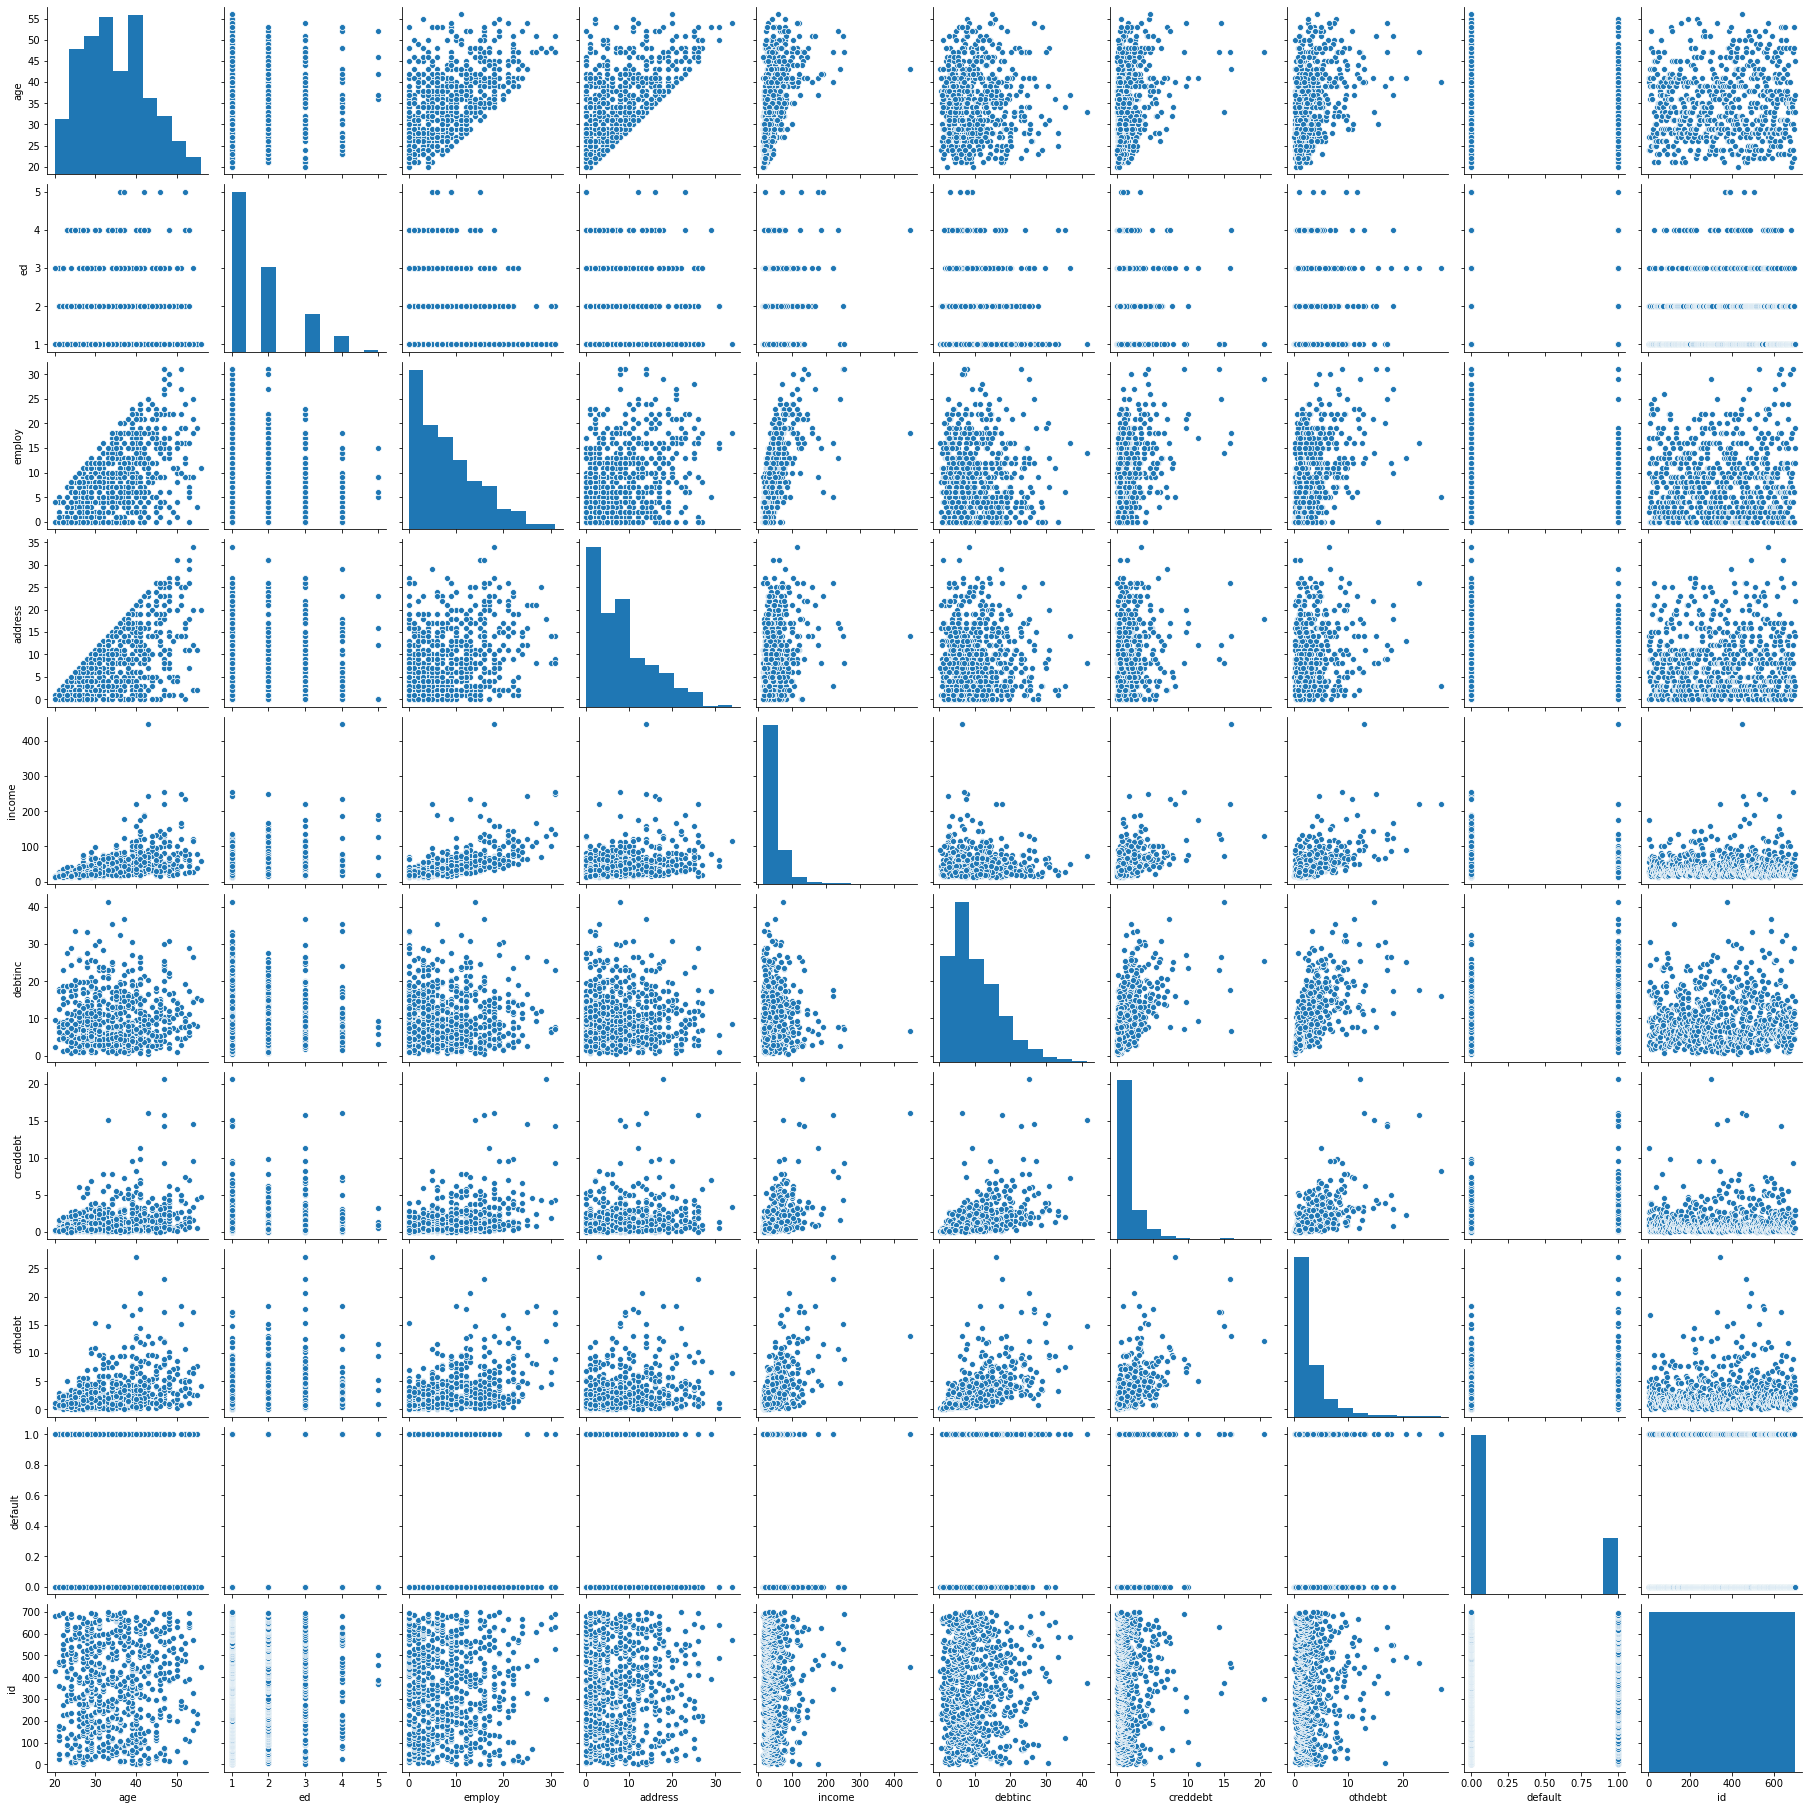

In [14]:
sns.pairplot(dataset)

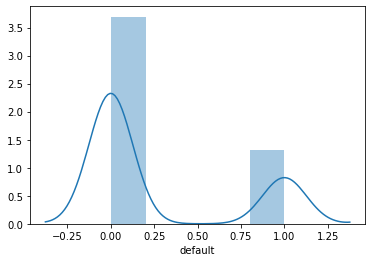

In [17]:
sns.distplot(dataset['default'])

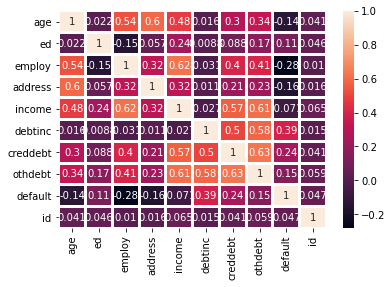

In [18]:
sns.heatmap(dataset.corr(), annot=True, linewidths=2)

In [19]:
dataset.columns

Index(['age', 'ed', 'employ', 'address', 'income', 'debtinc', 'creddebt',
       'othdebt', 'default', 'id'],
      dtype='object')

In [20]:
X=dataset[['age', 'ed', 'employ', 'address', 'income', 'debtinc', 'creddebt',
       'othdebt', 'id']]

In [21]:
y=dataset['default']

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
lr = LinearRegression()

In [26]:
lr.fit(X_train, y_train)

LinearRegression()

In [27]:
print(lr.intercept_)

0.07106480107825336


In [28]:
lr.coef_

array([ 5.87895449e-03, -7.00514497e-03, -2.96857908e-02, -6.57223268e-03,
        1.44059137e-03,  1.86968820e-02,  4.37452617e-02, -7.61835936e-03,
        1.15875622e-05])

In [29]:
cdf = pd.DataFrame(lr.coef_, X_train.columns, columns=['Coeff'])

In [30]:
cdf

,Coeff
age,0.005879
ed,-0.007005
employ,-0.029686
address,-0.006572
income,0.001441
debtinc,0.018697
creddebt,0.043745
othdebt,-0.007618
id,0.000012


In [31]:
predictions = lr.predict(X_test)

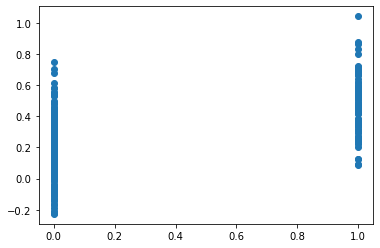

In [32]:
plt.scatter(y_test, predictions)

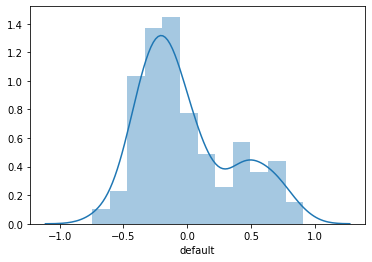

In [33]:
sns.distplot((y_test - predictions))

In [34]:
from sklearn import metrics

In [35]:
metrics.mean_absolute_error(y_test, predictions)

0.30478168560725855

In [36]:
MSE = metrics.mean_squared_error(y_test, predictions)
MSE

0.1362118131662273

In [37]:
np.sqrt(MSE)

0.36906884610628854

Case in point. Linear regression cannot be used at all since the data is not normalised.